# Symbolic computing with [SymPy](https://www.sympy.org/en/index.html)

Symbolic analysis can make a difference in determining __how__ to attack a problem before throwing numerical firepower at it. (Complexity or size reduction, for example.)

- __Symbols__
- __Numbers__ (Integer, Float, Rational)
- __Constants__
- __Functions__
- __Expression__
- __Manipulating expressions__
- __Simplification__
- __Expansion__
- __Factor, Collect, Combine__
- __Apart, Together, Cancel__
- __Substitutions__
- __Numerical evaluation__
- __Calculus__ (Derivatives, Integrals, Series, Limits)
- __Sums & Products__
- __Equations__
- __Linear Algebra__

In [1]:
import sympy
from sympy import I, pi, oo # frequently used symbols

In [2]:
sympy.init_printing() # enables MathJax to render SymPy expressions

## Symbols

Symbols have a name & a set of attributes. They are not especially useful by themselves, but are used as nodes in algebraic expression trees.

![symbol arguments](pics/symbol-arguments.png)

Symbols are used as nodes in algebraic expression trees.
Normally, symbols are associated with Python variables with similar names.

In [6]:
print(sympy.Symbol("x"               ).is_real)
print(sympy.Symbol('y',     real=True).is_real)
print(sympy.Symbol("z",imaginary=True).is_real)

None
True
False


- Below: Sympy recognizes $\sqrt{y^2} = y$

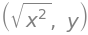

In [7]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", positive=True)
sympy.sqrt(x**2), sympy.sqrt(y**2)

Integer representation

In [8]:
n1 = sympy.Symbol("n")
n2 = sympy.Symbol("n", integer=True)
n3 = sympy.Symbol("n", odd=True)

sympy.cos(n1*pi), sympy.cos(n2*pi), sympy.cos(n3*pi)

Creating multiple symbols in one function call

In [9]:
a, b, c = sympy.symbols("a, b, c", negative=True)
d, e, f = sympy.symbols("d, e, f", positive=True)

### Numbers
Can't directly use Python objects for integers, floats.

Instead use __Sympy.Integer__, __Sympy.Float__ (Not often needed, because Sympy auto-promotes numbers to class instances when needed.)

In [10]:
i = sympy.Integer(19)
i.is_Integer, i.is_real, i.is_odd

(True, True, True)

In [11]:
f = sympy.Float(2.3)
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

In [12]:
i, f = sympy.sympify(19), sympy.sympify(2.3)
type(i), type(f)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

### Integers

There is a difference between a `Symbol instance` with `integer=True` and an instance of Integer. `Symbol` with `integer=True` represents some integer; an Integer instance represents a specific integer. 


`is_integer` is True for both. `is_Integer` (note the capital I) is only True for Integer instances. 

SymPy integers & floats have arbitrary precision, no upper/lower bounds. They are much easier to use with very large numbers.

In [13]:
n = sympy.Symbol("n", integer=True)
i = sympy.Integer(19)

In [14]:
print(n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol)
print(i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol)

True False None True
True True True False


In [15]:
print(i**50)

8663234049605954426644038200675212212900743262211018069459689001


In [16]:
print(sympy.factorial(100))

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


### Float

Also arbitrary precision. SymPy Float can represent the real number 0.3 without the limitations of floating-point format.

In [17]:
"%.25f" % 0.3  # create a string represention with 25 decimals

'0.2999999999999999888977698'

In [18]:
print(sympy.Float( 0.3, 25))
print(sympy.Float('0.3',25))

0.2999999999999999888977698
0.3000000000000000000000000


### Rationals

Fractions of two integers.

In [19]:
sympy.Rational(11, 13)

In [20]:
r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)
r1*r2, r1/r2

### Constants & Special Symbols
![constants-specials](pics/constants-specials.png)

In [21]:
sympy.pi, sympy.E, sympy.EulerGamma, sympy.I, sympy.oo

### Functions

Sympy understands __defined__ vs __undefined__ functions, and __applied__ vs __unapplied__ functions.

Creating a function with __Function__ returns an undefined, unapplied function. It has a name but cannot be evaluated.

In [22]:
f = sympy.Function("f"); print(type(f))

<class 'sympy.core.function.UndefinedFunction'>


In [23]:
f(x)

In [24]:
x,y,z = sympy.symbols("x, y, z")
g     = sympy.Function("g")(x,y,z)
g, g.free_symbols

In [25]:
# defined functions have a specific implementation.
# they can be numerically evaluated.
sympy.sin, sympy.sin(x), sympy.sin(pi*1.5)

(sin, sin(x), -1)

In [26]:
n = sympy.Symbol("n", integer=True)
sympy.sin(n*pi)

In [27]:
# lambda functions: no name, but an executable body.
h = sympy.Lambda(x, x**2)
h, h(5), h(1+x)

### Expressions
Sympy expressions = represented as tree structures.

Symbols = leaves; nodes = math op class instances.

In [28]:
x = sympy.Symbol("x")
e = 1 + 2*x**2 + 3*x**3
e, e.args, e.args[1]

![expression tree](pics/expression-tree.png)

In [29]:
# explore the expression tree using the args attribute
# args is a tuple of sub-expressions
e.args[1].args[1], e.args[1].args[0], e.args[2].args[1]

### Manipulating Expressions

SymPy's main job to provide different transforms to expression trees. These transforms create new expressions & do not change the originals. In other words, *expression trees are immutable*.

### Simplifications

Simplification is a _good thing_, but often very ambiguous. (It's often non-trivial to determine if an expression appears simplier to a human being.)

![simplifications](pics/simplifications.png)

In [30]:
expr = 2*(x**2-x) - x*(x+1); expr

In [31]:
sympy.simplify(expr), expr.simplify()

Both `sympy.simplify(expr)` and `expr.simplify()` return new
expression trees and leave the expression expr untouched. 

In this example, `expr` can be simplified by expanding the products, canceling terms, then refactoring. `sympy.simplify` will attempt
different strategies and will simplify trigonometric and
power expressions.

In [32]:
expr = 2 * sympy.cos(x) * sympy.sin(x)
expr, sympy.simplify(expr)

In [33]:
expr = sympy.exp(x) * sympy.exp(y)
expr, sympy.simplify(expr)

# can also use sympy.trigsimp and sympy.powsimp 
# to perform only their specified simplifications
# leaving the rest of the expression untouched.

### Expansion

When __sympy.simplify__ does not provide acceptable results. Expression expansion can help with designing a more manual approach.

In [52]:
expr = (x+1)*(x+2)
sympy.expand(expr)

In [53]:
# trig expansions
sympy.sin(x+y).expand(trig=True) 

In [54]:
# logarithmic expansions
a, b = sympy.symbols("a, b", positive=True)
sympy.log(a*b).expand(log=True) 

In [55]:
# separating real & imag parts
sympy.exp(I*a + b).expand(complex=True) 

In [56]:
# power expressions - expanding the base & exponent
sympy.expand((a*b)**x, power_exp=True) 

In [57]:
sympy.exp(I*(a-b)*x).expand(power_exp=True)

### Factoring, Collecting, Combining

__expand__ often used to expand a function, cancel some terms, then refactor or recombine the expression. __factor__ helps do this.

In [42]:
sympy.factor(x**2 - 1)

In [43]:
sympy.factor(x*sympy.cos(y) + x*sympy.sin(z))

In [44]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

In [45]:
# use collect for fine-grained factor control
# collect factors terms containing a given symbol or list of symbols.
expr = x + y + x*y*z
expr.factor(), expr.collect(x), expr.collect(y)

In [46]:
# collect also supports method chaining
expr = sympy.cos(x+y) + sympy.sin(x-y)

expr.expand(trig=True).collect(
    [sympy.cos(x), 
     sympy.sin(x)]).collect(sympy.cos(y) - sympy.sin(y))

## Together, apart, cancel - rewriting of fractions

In [47]:
# rewrite fraction as a partial fraction
sympy.apart(1/(x**2 + 3*x + 2), x) 

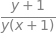

In [48]:
# combine partial into single fraction
sympy.together(1/(y*x+y) + 1/(1+x)) 

In [49]:
# cancel shared factors btwn numerator, denominator
sympy.cancel(y/(y*x+y)) 

## Substitutions

Th most basic use case: method called on an expression. The 1st argument = symbol/expr to be replaced; the 2nd argument = new symbol/expr.

In [50]:
(x+y).subs(x,y)

In [51]:
sympy.sin(x*sympy.exp(x)).subs(x,y)

Instead of chaining multiple __subs__ calls when multiple substitutions are required, we can pass a dictionary as the only argument. It maps old symbols or expressions to new ones.

In [52]:
sympy.sin(x*z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

Typical use case: substitute numerical values for symbolic numbers. A convenient way of doing this is to define a dictionary that translates the symbols to numerical values, and passing this dictionary to the subs method.

In [53]:
expr = x*y + z**2*x
values = {x: 1.25, y: 0.4, z: 3.2}
expr.subs(values)

## Numerical evaluation

Sooner or later you'll need to evaluate symbolic expressions numerically (for plots or  numerical results). A SymPy expression can be evaluated using either __sympy.N__ or the __evalf__ method.

In [54]:
# 2nd argument = #significant digits
sympy.N(1+pi), sympy.N(pi, 20)

In [55]:
(x + 1/pi).evalf(10)

When we need to evaluate an expression for multiple inputs, we can loop the evaluation.

In [56]:
expr = sympy.sin(pi*x*sympy.exp(x))
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

Looping is slow. SymPy provides __sympy.lambdify__ instead. It takes a set of free symbols and an expression, and generates a function that evaluates the value of the expression.

The function takes the same number of arguments as the number of free symbols passed as first argument to sympy.lambdify.

In [57]:
expr_func = sympy.lambdify(x, expr)
expr_func(1.0)

__expr_func__ expects numerical (scalar) values, so we can't pass a symbol. SymPy can generate functions that are NumPy-aware. Below: How a SymPy expression is converted to NumPy-aware vectorized function for efficient evaluation.

In [58]:
expr_func = sympy.lambdify(x, expr, 'numpy')
expr_func(1.0)

In [59]:
import numpy as np
xvalues = np.arange(0, 10)
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## Calculus - Derivatives

The derivative of a function describes a rate of change at a given point. We can use __sympy.diff__ or the __diff__ method of SymPy expressions. These functions accept a symbol or symbols for which the function or the expression is to be derived with respect to.

In [60]:
f = sympy.Function('f')(x)

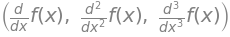

In [61]:
# first-order derivatives
sympy.diff(f,x), sympy.diff(f,x,x), sympy.diff(f,x,3)

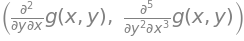

In [62]:
# multivariate function derivatives
g = sympy.Function('g')(x,y)
g.diff(x,y), g.diff(x,3,y,2)

We can evaluate derivatives of defined functions, which result in new expressions that correspond to the evaluated derivatives. Below: using sympy.diff to evaluate derivatives of arbitrary mathematical expressions, such as polynomials.

In [63]:
expr = x**4 + x**3 + x**2 + x+1
expr.diff(x), expr.diff(x,x)

In [64]:
expr = (x+1)**3 * y**2 * (z-1)
expr.diff(x, y, z)

In [65]:
# trig function differentials
expr = sympy.sin(x*y) * sympy.cos(x/2)
expr.diff(x)

In [66]:
# special function differentials
expr = sympy.special.polynomials.hermite(x,0)
expr.diff(x).doit()

AttributeError: module 'sympy' has no attribute 'special'

Calling sympy.diff results in a new expression.

If instead we want to represent a derivative of a definite expression, create an instance of the Derivative class. 1st argument = the expression; 2nd argument = the derivative.

This (formal) representation can be evaluated using __doit__.

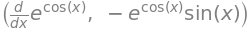

In [67]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)
d, d.doit()

## Integrals

Integrals are evaluated using __sympy.integrate__.

Formal integrals represented using __sympy.Integral__.

Two forms: __definite__ (specified integration limits, can be interpreted as an area or volume) & __indefinite__ (no integration limits)

In [68]:
a, b = sympy.symbols("a, b")
x, y = sympy.symbols('x, y')
f    = sympy.Function('f')(x)

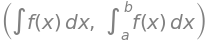

In [69]:
sympy.integrate(f), sympy.integrate(f,(x,a,b))

In [70]:
sympy.integrate(sympy.sin(x))

In [71]:
sympy.integrate(sympy.sin(x), (x,a,b))

In [72]:
# Definite integrals can use limits from negative infinity to positive infinity.
sympy.integrate(sympy.exp(-x**2), (x,0,oo))

In [73]:
a,b,c = sympy.symbols("a, b, c", positive=True)

In [74]:
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

Computing integrals symbolically is a difficult problem. When SymPy fails to evaluate an integral, an instance of __sympy.Integral__, representing the formal integral, is returned instead.

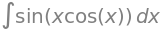

In [75]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

Multivariable expressions can be integrated. In the case of indefinite integral of a multivariable expression, the integration variable has to be specified explicitly.

In [76]:
expr = sympy.sin(x*sympy.exp(y))
sympy.integrate(expr, x)

In [77]:
expr = (x+y)**2
sympy.integrate(expr,x)

By passing more than one symbol, or more than one tuple that contain symbols and their integration limits, we can carry out multiple integration.

In [78]:
sympy.integrate(expr,x,y)

In [79]:
sympy.integrate(expr,(x,0,1),(y,0,1))

## Series expansions

With a series expansion, a function can be written as a polynomial with coefficients given by the derivatives of the function at the point where the expansion is made. By truncating the expansion at some order n, the nth order approximation of the function is obtained.

In [80]:
# undefined functions: expansion is computed up to 6th order around x0=0.
x = sympy.Symbol("x")
f = sympy.Function("f")(x)
sympy.series(f,x)

                             ⎛  2      ⎞│         ⎛  3      ⎞│         ⎛  4   
                           2 ⎜ d       ⎟│       3 ⎜ d       ⎟│       4 ⎜ d    
                          x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(
                             ⎜  2      ⎟│         ⎜  3      ⎟│         ⎜  4   
         ⎛d       ⎞│         ⎝dξ       ⎠│ξ=0      ⎝dξ       ⎠│ξ=0      ⎝dξ    
f(0) + x⋅⎜──(f(ξ))⎟│    + ────────────────── + ────────────────── + ──────────
         ⎝dξ      ⎠│ξ=0           2                    6                    24

   ⎞│         ⎛  5      ⎞│           
   ⎟│       5 ⎜ d       ⎟│           
ξ))⎟│      x ⋅⎜───(f(ξ))⎟│           
   ⎟│         ⎜  5      ⎟│           
   ⎠│ξ=0      ⎝dξ       ⎠│ξ=0    ⎛ 6⎞
──────── + ────────────────── + O⎝x ⎠
                  120                

In [81]:
# to specify point around which to expand, provide x0 keyword.
# n=2 tells function to return expansion up to 2nd order term.
x0 = sympy.Symbol("{x_0}")
f.series(x, x0, n=2)

                       ⎛ d        ⎞│            ⎛           2           ⎞
f({x_0}) + (x - {x_0})⋅⎜───(f(ξ₁))⎟│         + O⎝(x - {x_0}) ; x → {x_0}⎠
                       ⎝dξ₁       ⎠│ξ₁={x_0}                             

In [82]:
# use remove0() to remove order term
f.series(x, x0, n=2).removeO()

            ⎛ d        ⎞│                   
(x - {x_0})⋅⎜───(f(ξ₁))⎟│         + f({x_0})
            ⎝dξ₁       ⎠│ξ₁={x_0}           

In [83]:
# some well-known series expansions:
sympy.cos(x).series()

In [84]:
sympy.sin(x).series()

In [85]:
sympy.exp(x).series()

In [86]:
(1/(1+x)).series()

In [87]:
expr = sympy.cos(x) / (1 + sympy.sin(x * y))

expr.series(x,n=4), expr.series(y,n=4)

In [88]:
expr.series(y).removeO().series(x).removeO().expand()

## Limits

Value of a function as a dependent variable approaches a specific value (or approaches pos/neg infinity).

In [89]:
#To find the limit of sin(x)/x as x goes to zero:
sympy.limit(sympy.sin(x) / x, x, 0)

# *** DOUBLECHECK THIS RESULT. EXPECTED TO RETURN 1. ***

We can also use __sympy.limit__ to compute symbolic limits, which can be illustrated by computing derivatives using the previous definition.

In [90]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")

In [91]:
diff_limit = (f(x+h)-f(x))/h

In [92]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [93]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

Another example: find the asymptotic behavior as a function, for example
as its dependent variable approaches infinity.

In [94]:
expr = (x**2-3*x)/(2*x-2)

p = sympy.limit(expr/x,   x, oo)
q = sympy.limit(expr-p*x, x, oo)

p,q # result: asymptotic behavior of f(x) as x becomes large:
# f(x) --> x/2-1

## Sums and products

1st argument is an expression; 2nd argument is a tuple (n,n1,n2) - n is a symbol; n1 & n2 are upper & lower limits for symbol n.

In [95]:
n = sympy.symbols("n", integer=True)
x = sympy.Sum(1/(n**2), (n, 1, oo))

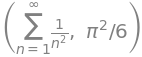

In [96]:
x, x.doit()

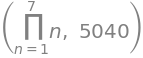

In [97]:
x = sympy.Product(n,(n,1,7))
x, x.doit()

In [98]:
x = sympy.Symbol("x")

In [99]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

## Equation Solving

If an equation can be solved analytically, there is a good chance that SymPy is able to find the solution. If not, numerical methods might be the only option.

In its simplest form, equation solving involves a single equation with a single unknown variable, and no additional parameters: for example, finding the value of x that satisfy the second-degree polynomial
equation x 2 + 2 x – 3 = 0 .

In [100]:
x = sympy.symbols("x")
sympy.solve(x**2 + 2*x - 3)

That is, the solutions are x = -3 and x = 1. 

The argument to sympy.solve is an expression that will be solved under the assumption that it equals zero. When this expression contains more than one symbol, the variable that is to be solved for must be given as a second argument.

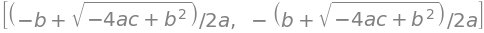

In [101]:
a,b,c = sympy.symbols("a, b, c")
sympy.solve(a*x**2 + b*x + c, x)

sympy.solve can also solve trigonometric expressions and other special functions.

In [102]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

In [103]:
sympy.solve(sympy.exp(x) + 2*x, x)

It is not uncommon to encounter equations that are not solvable algebraically, or that SymPy is unable to solve. 

In these cases SymPy will return a formal solution, which can be evaluated numerically, or raise an error if no method is available.

In [104]:
sympy.solve(x**5 - x**2 + 1, x)

In [105]:
sympy.solve(sympy.tan(x)+x, x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation x + tan(x)

Solving equations for >1 unknown variable is a generalization of univariate solvers. Pass a list of expressions instead of a single one as first argument to sympy.solve. The second argument should be a list of symbols to solve for. 

Below: how to solve two systems that are linear and nonlinear equations in x and y, respectively.

In [106]:
eq1 = x+2 * y-1
eq2 = x   - y+1

sympy.solve([eq1, eq2], [x, y], dict=True)

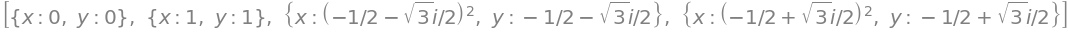

In [107]:
eq1 = x**2 - y
eq2 = y**2 - x

sols = sympy.solve([eq1, eq2], [x, y], dict=True)
sols

sympy.solve returns a list where each element represents a solution to the equation system. 

The optional keyword argument __dict = True__ requests each solution in dictionary format, which maps the symbols that have been solved for
to their values. 

This dictionary can be used in calls to __subs__, which is used below (checks that each solution indeed satisfies the two equations).

In [108]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 
 for sol in sols]

[True, True, True, True]

## Linear algebra
![sympy-matrix-ops](pics/sympy-matrix-ops.png)

In [109]:
sympy.Matrix([1,2])

⎡1⎤
⎢ ⎥
⎣2⎦

In [110]:
sympy.Matrix([[1,2]])

[1  2]

In [111]:
sympy.Matrix([[1, 2], [3, 4]])

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [112]:
sympy.Matrix(3, 4, lambda m,n: 10 * m + n)

⎡0   1   2   3 ⎤
⎢              ⎥
⎢10  11  12  13⎥
⎢              ⎥
⎣20  21  22  23⎦

Sympy matrix elements can be symbolic expressions.

In [113]:
a, b, c, d = sympy.symbols("a, b, c, d")

In [114]:
M = sympy.Matrix([[a, b], [c, d]])
M, M*M

⎛        ⎡ 2                  ⎤⎞
⎜⎡a  b⎤  ⎢a  + b⋅c   a⋅b + b⋅d⎥⎟
⎜⎢    ⎥, ⎢                    ⎥⎟
⎜⎣c  d⎦  ⎢                  2 ⎥⎟
⎝        ⎣a⋅c + c⋅d  b⋅c + d  ⎦⎠

In [115]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))
M*x

⎡a⋅x₁ + b⋅x₂⎤
⎢           ⎥
⎣c⋅x₁ + d⋅x₂⎦

With purely numerical methods, we would have to choose particular values of p and q before beginning to solve this problem, for example, using an LU factorization (or by computing the inverse) of the matrix on the left-hand side of the equation. 

With a symbolic computing approach we can proceed with computing the solution, as if we did the calculation analytically by hand. With SymPy, we can simply define symbols for the unknown variables and parameters,
and setup the required matrix objects.

In [116]:
p,q = sympy.symbols("p, q")
M = sympy.Matrix([[1,p],[q,1]])
M

⎡1  p⎤
⎢    ⎥
⎣q  1⎦

In [117]:
b = sympy.Matrix(sympy.symbols("b_1, b_2"))
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

In [118]:
M.solve(b)

⎡-b₁ + b₂⋅p⎤
⎢──────────⎥
⎢ p⋅q - 1  ⎥
⎢          ⎥
⎢b₁⋅q - b₂ ⎥
⎢───────── ⎥
⎣ p⋅q - 1  ⎦

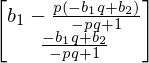

In [141]:
M.LUsolve(b)

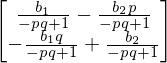

In [142]:
M.inv()*b # multiple inverse of M by vector b: